**HW 6**
Answers below code!

In [2]:
# Imports and utility functions
import sympy
import numpy as np
from sympy import nsolve, pi, E, log, S, latex, Float
from sympy.abc import x
from sympy.physics.units import hbar, nm, V, eV, electron_rest_mass, meter, kg, second, K, boltzmann_constant, cm, planck, elementary_charge, coulomb, mm, um,ohm, A,us, ms
from sympy.physics.units import convert_to
from sympy import sin, cos, sqrt, sinh, cosh

from sympy.plotting import plot
from sympy import integrate

from sympy.physics.units import Quantity
from IPython.display import Markdown as md
from matplotlib import pyplot as plt

def latex_units(expr, units):
    return latex(Float(simplify(expr / units), 3)) + " " + latex(units)

def unit(expr):
    try:
        return expr.as_coeff_Mul()[1]
    except:
        return 1

def simplify(expr):
    return convert_to(expr, [kg, meter, second, K, coulomb]).evalf(50)
    
def without_units(x_units, y_units):
    def wrapper(f):
        def f_(x):
            return simplify(f(x * x_units) / y_units)
        return f_
    return wrapper

def plot_this(x_min, x_max, y_units, num = 100):
    def wrapper(f):
        x_units = unit(x_min)
        f_ = lambda x: simplify(f(x * x_units) / y_units)

        x = np.linspace(float(x_min/x_units), float(x_max/x_units), num)
        y = np.array([f_(x_) for x_ in x])

        plt.plot(x, y)
        print(latex(x_units))
        plt.xlabel(f"${latex(x_units).replace('//', '////')}$")
        plt.ylabel(latex(y_units))
        return f
    return wrapper

In [3]:
def resistivity(n, p, n_mobility, p_mobility):
    return 1 / (elementary_charge * (n * n_mobility + p * p_mobility))

def resistance(rho, A, L):
    return rho * L / A
    
def einstein_ratio(T):
    return boltzmann_constant*T/elementary_charge

def diffusion_current(carrier_gradient, carrier_mobility, T):
    D = einstein_ratio(T) * carrier_mobility
    J = elementary_charge * D * carrier_gradient
    return J


In [4]:
n_i = 9.49e9/cm**3 # assume room temperature si

bar_length = 10 * mm
bar_area = 1 * mm * 1 * um

def solve_problem(doping_conc, n_mobility, p_mobility):
    latex_str = f"|${latex_units(doping_conc, 1/cm**3)}$ | ${latex_units(n_mobility, cm**2 / (V*second))}$ | ${latex_units(p_mobility, cm**2 / (V*second))}$"
    # n case
    rho = resistivity(doping_conc, n_i**2 / doping_conc, n_mobility, p_mobility)
    R = resistance(rho, bar_area, bar_length)
    latex_str += f"|${latex_units(R, ohm)}$"

    # p case
    rho = resistivity(n_i**2 / doping_conc, doping_conc, n_mobility, p_mobility)
    R = resistance(rho, bar_area, bar_length)
    latex_str += f"| ${latex_units(R, ohm)}$"

    # n case diffusion current
    J = diffusion_current(doping_conc / um, n_mobility, 300*K)

    latex_str += f"| ${latex_units(J, A/cm**2)}$"

    # p case diffusion current
    J = diffusion_current(doping_conc / um, p_mobility, 300*K)

    latex_str += f"| ${latex_units(J, A/cm**2)}$|"

    return(latex_str)


In [5]:
display(md(f"""
**Problem 1.**
|Doping Concentration|n-type electron mobility|p-type electron mobility|n-type bar resistance|p-type bar resistance|n-type diffusion current|p-type diffusion current|
|---|---|---|---|---|---|---|
{solve_problem(10**14 / cm**3, 1358 * cm**2 / (V*second), 461 * cm**2 / (V*second))}
{solve_problem(10**15 / cm**3, 1345 * cm**2 / (V*second), 458 * cm**2 / (V*second))}
{solve_problem(10**17 / cm**3, 801 * cm**2 / (V*second), 331 * cm**2 / (V*second))}
"""))


**Problem 1.**
|Doping Concentration|n-type electron mobility|p-type electron mobility|n-type bar resistance|p-type bar resistance|n-type diffusion current|p-type diffusion current|
|---|---|---|---|---|---|---|
|$1.0 \cdot 10^{14} \frac{1}{\text{cm}^{3}}$ | $1.36 \cdot 10^{3} \frac{\text{cm}^{2}}{\text{s} \text{V}}$ | $461.0 \frac{\text{cm}^{2}}{\text{s} \text{V}}$|$4.6 \cdot 10^{6} \Omega$| $1.35 \cdot 10^{7} \Omega$| $5.63 \frac{\text{A}}{\text{cm}^{2}}$| $1.91 \frac{\text{A}}{\text{cm}^{2}}$|
|$1.0 \cdot 10^{15} \frac{1}{\text{cm}^{3}}$ | $1.35 \cdot 10^{3} \frac{\text{cm}^{2}}{\text{s} \text{V}}$ | $458.0 \frac{\text{cm}^{2}}{\text{s} \text{V}}$|$4.64 \cdot 10^{5} \Omega$| $1.36 \cdot 10^{6} \Omega$| $55.7 \frac{\text{A}}{\text{cm}^{2}}$| $19.0 \frac{\text{A}}{\text{cm}^{2}}$|
|$1.0 \cdot 10^{17} \frac{1}{\text{cm}^{3}}$ | $801.0 \frac{\text{cm}^{2}}{\text{s} \text{V}}$ | $331.0 \frac{\text{cm}^{2}}{\text{s} \text{V}}$|$7.79 \cdot 10^{3} \Omega$| $1.89 \cdot 10^{4} \Omega$| $3.32 \cdot 10^{3} \frac{\text{A}}{\text{cm}^{2}}$| $1.37 \cdot 10^{3} \frac{\text{A}}{\text{cm}^{2}}$|


**Problem 2**

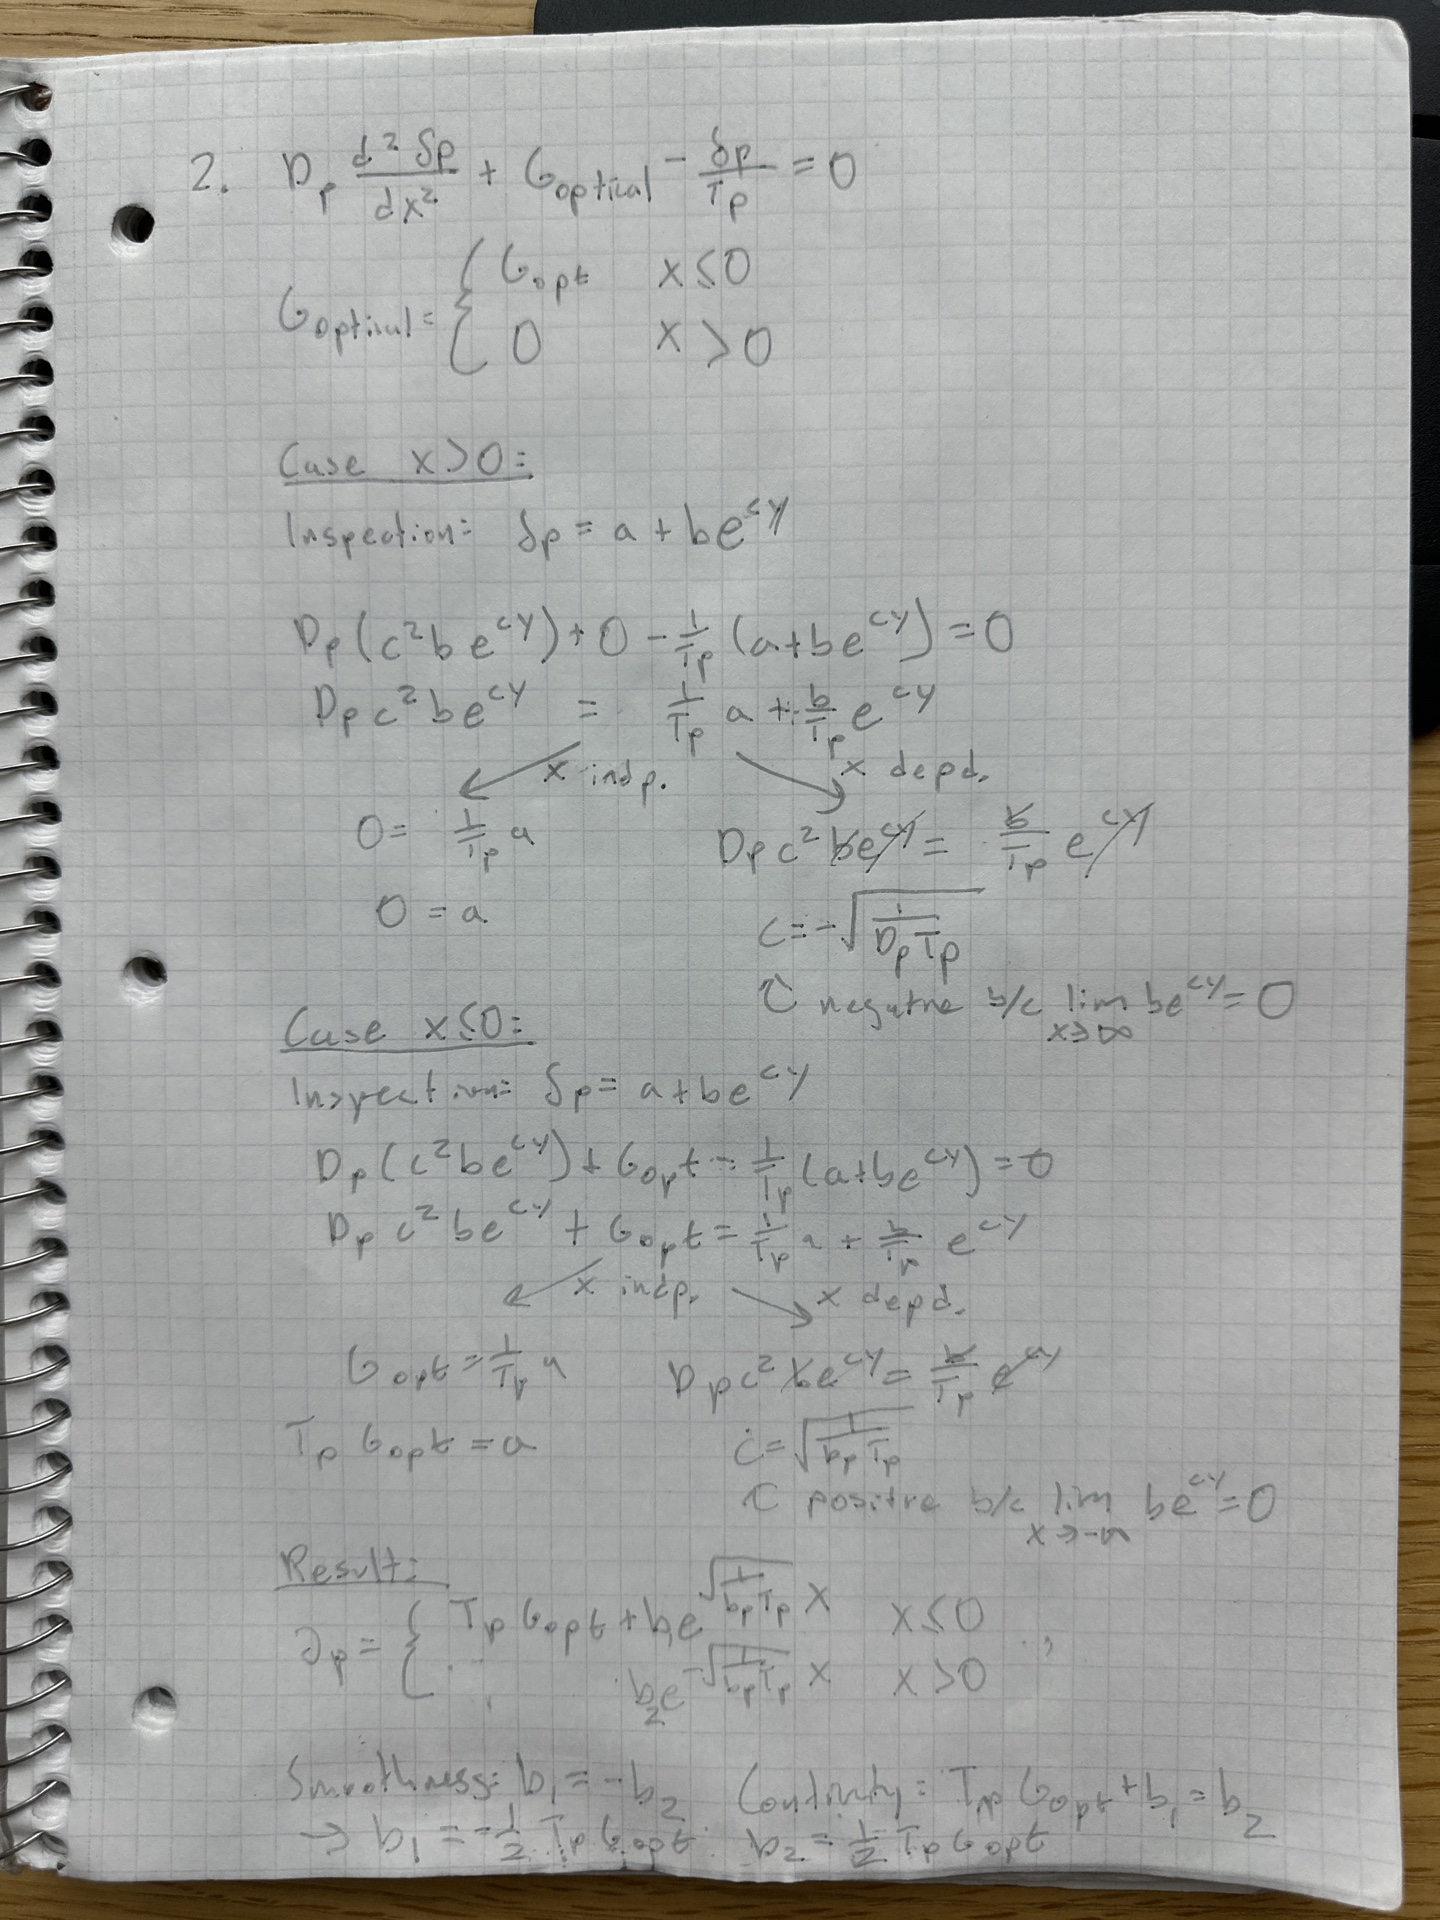

In [6]:
from IPython.display import Image
display(md("**Problem 2**"))
Image(filename="./Image1.jpeg")

In [7]:
x_min = - 2 # mm
x_max = 2

G_opt =  10**17 * cm ** -3 / second
D_p = 12 * cm ** 2 / second
t_p = 50 * us

@without_units(mm, cm ** -3)
def dp(x):
    diffusion_length = sqrt(D_p * t_p)
    if x <= 0:
        return t_p * G_opt - 1/2 * (t_p * G_opt) * E ** (x/diffusion_length)
    else:
        return 1/2 * (t_p * G_opt) * E ** (-x/diffusion_length)


Text(0, 0.5, '$\\delta p (cm^{-3})$')

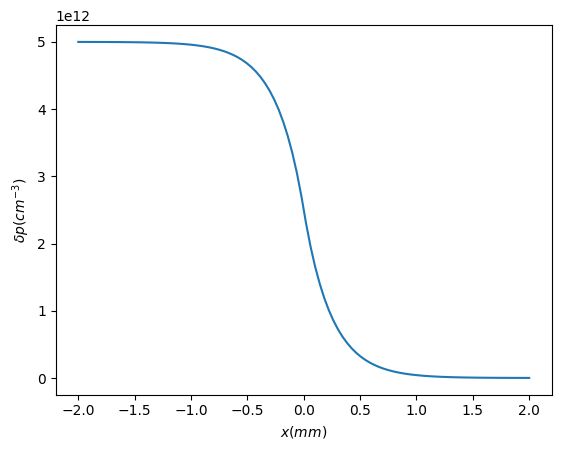

In [8]:
x = np.linspace(x_min , x_max, 100)
y = np.array([dp(x_) for x_ in x])

plt.plot(x, y)
plt.xlabel("$x (mm)$")
plt.ylabel("$\delta p (cm^{-3})$")


**Problem 3**

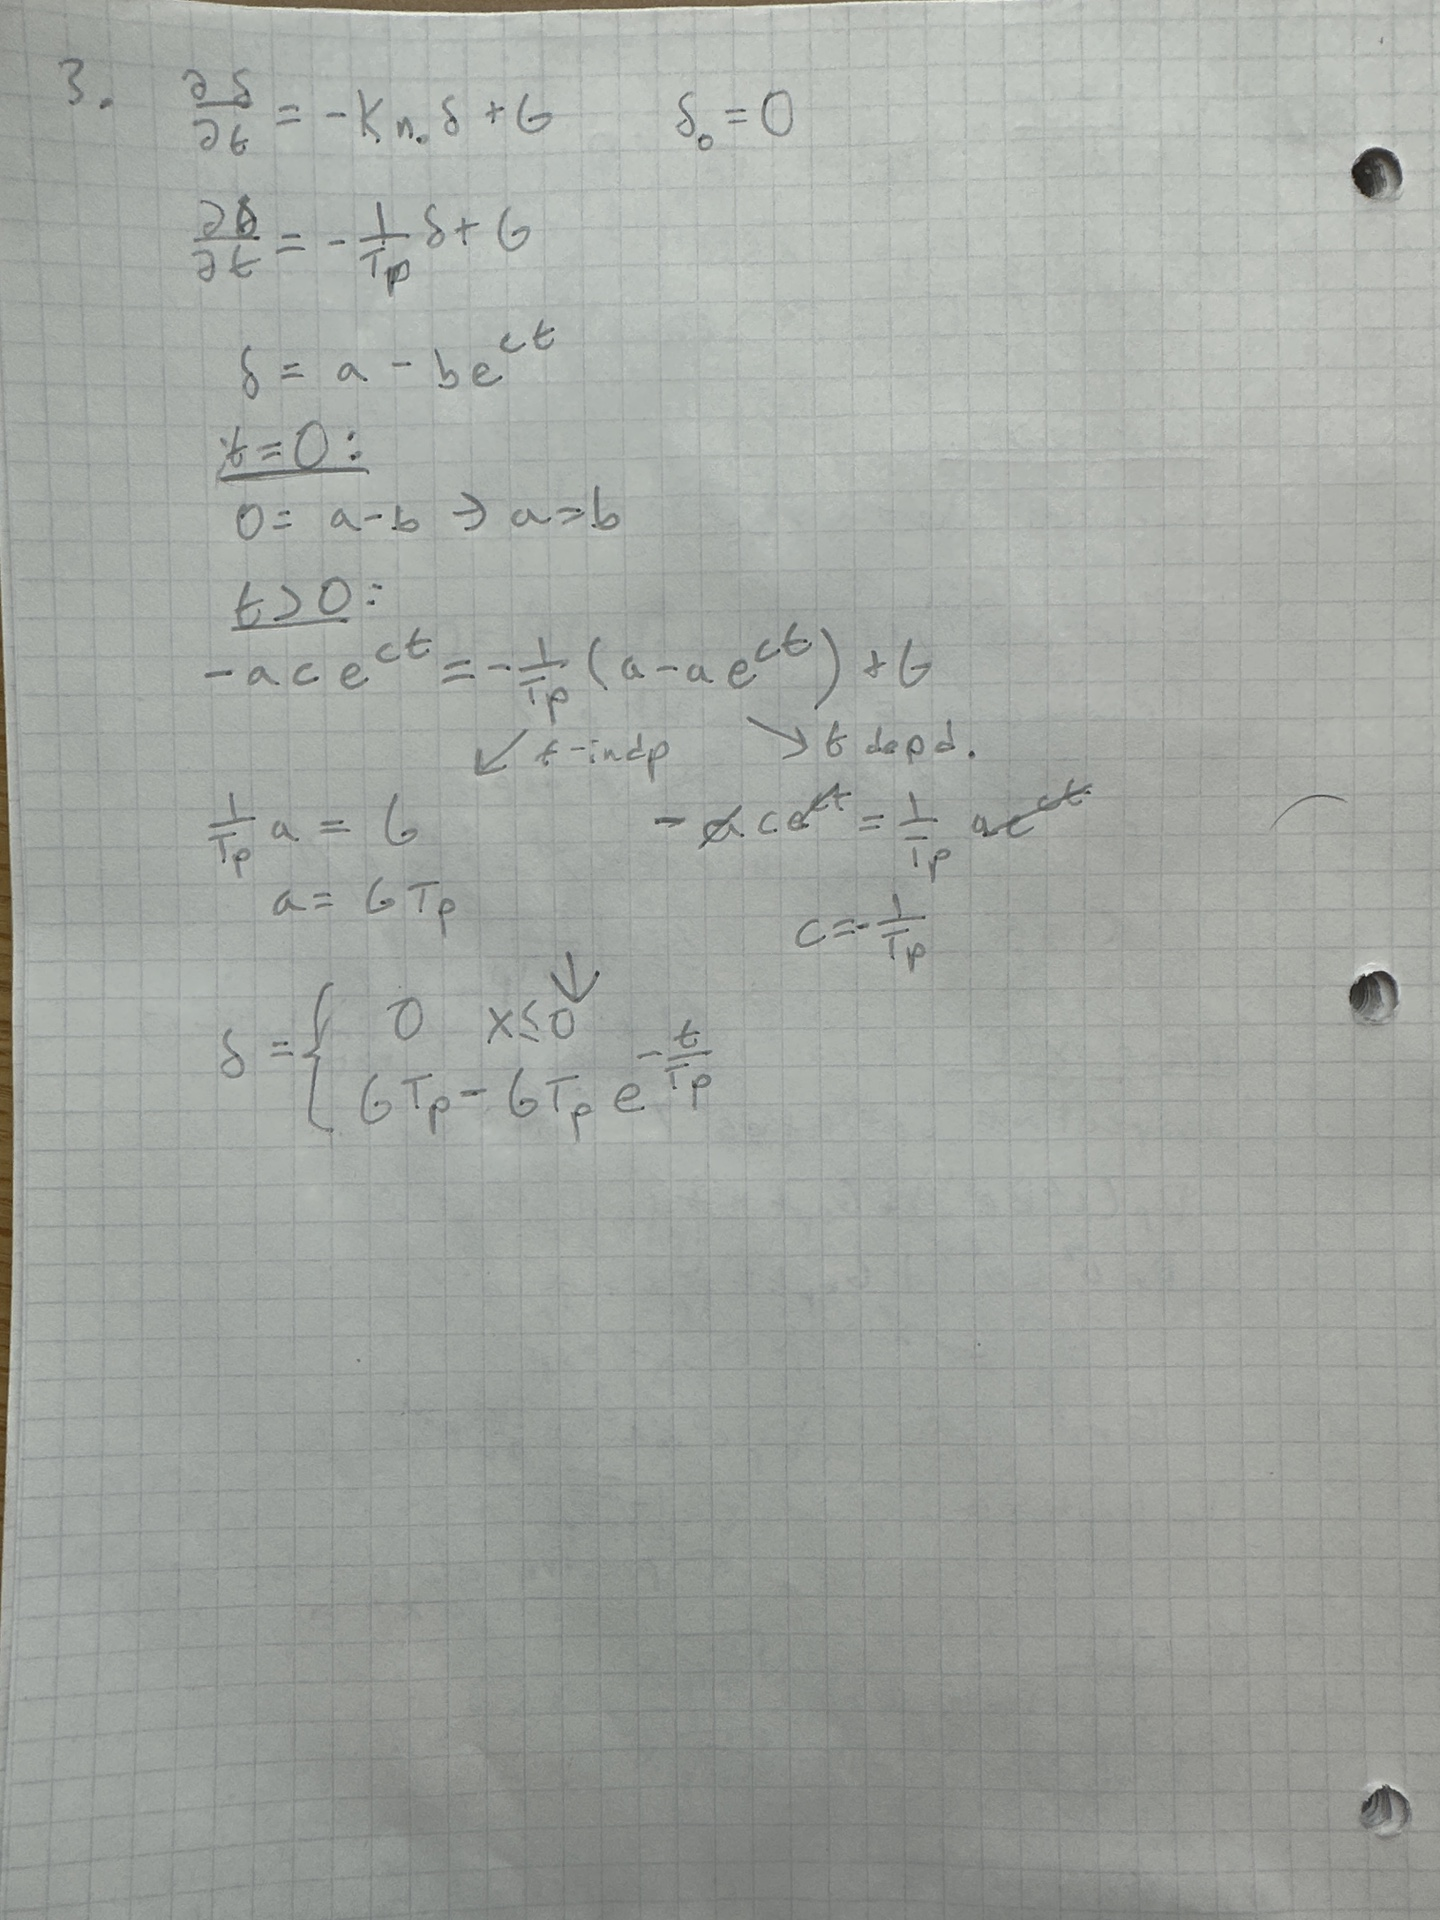

In [9]:
from IPython.display import Image
display(md("**Problem 3**"))
Image(filename="./Image2.jpeg")

In [10]:
t_min = - 0.2 # ms
t_max = 0.5

n_i = 9.49e9/cm**3
N_d = 10**16 / cm**3

G_opt =  10**17 * cm ** -3 / second
t_p = 50 * us

def d(t):
    if t <= 0:
        return 0
    else:
        return G_opt * t_p - G_opt * t_p * E ** (-t/t_p)

@without_units(ms, cm ** -3)
def n(t):
    return d(t) + N_d


@without_units(ms, cm ** -3)
def p(t):
    return d(t) + n_i**2 / N_d

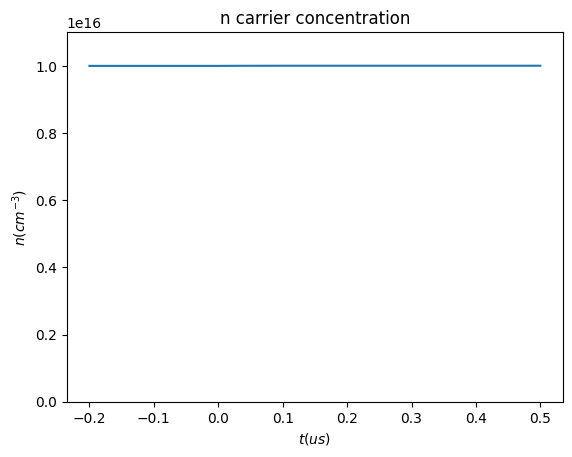

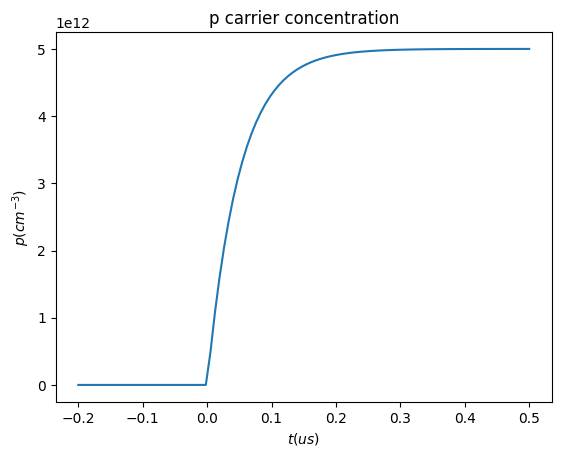

In [11]:
x = np.linspace(t_min , t_max, 100)
y = np.array([n(t_) for t_ in x])

plt.plot(x, y)
plt.xlabel("$t (us)$")
plt.ylabel("$n (cm^{-3})$")
plt.title("n carrier concentration")
plt.gca().set_ylim(ymin=0, ymax =float(np.max(y)*1.1))

plt.show()

x = np.linspace(t_min , t_max, 100)
y = np.array([p(t_) for t_ in x])

plt.plot(x, y)
plt.xlabel("$t (us)$")
plt.ylabel("$p (cm^{-3})$")
plt.title("p carrier concentration")
plt.show()


**Problem 4**

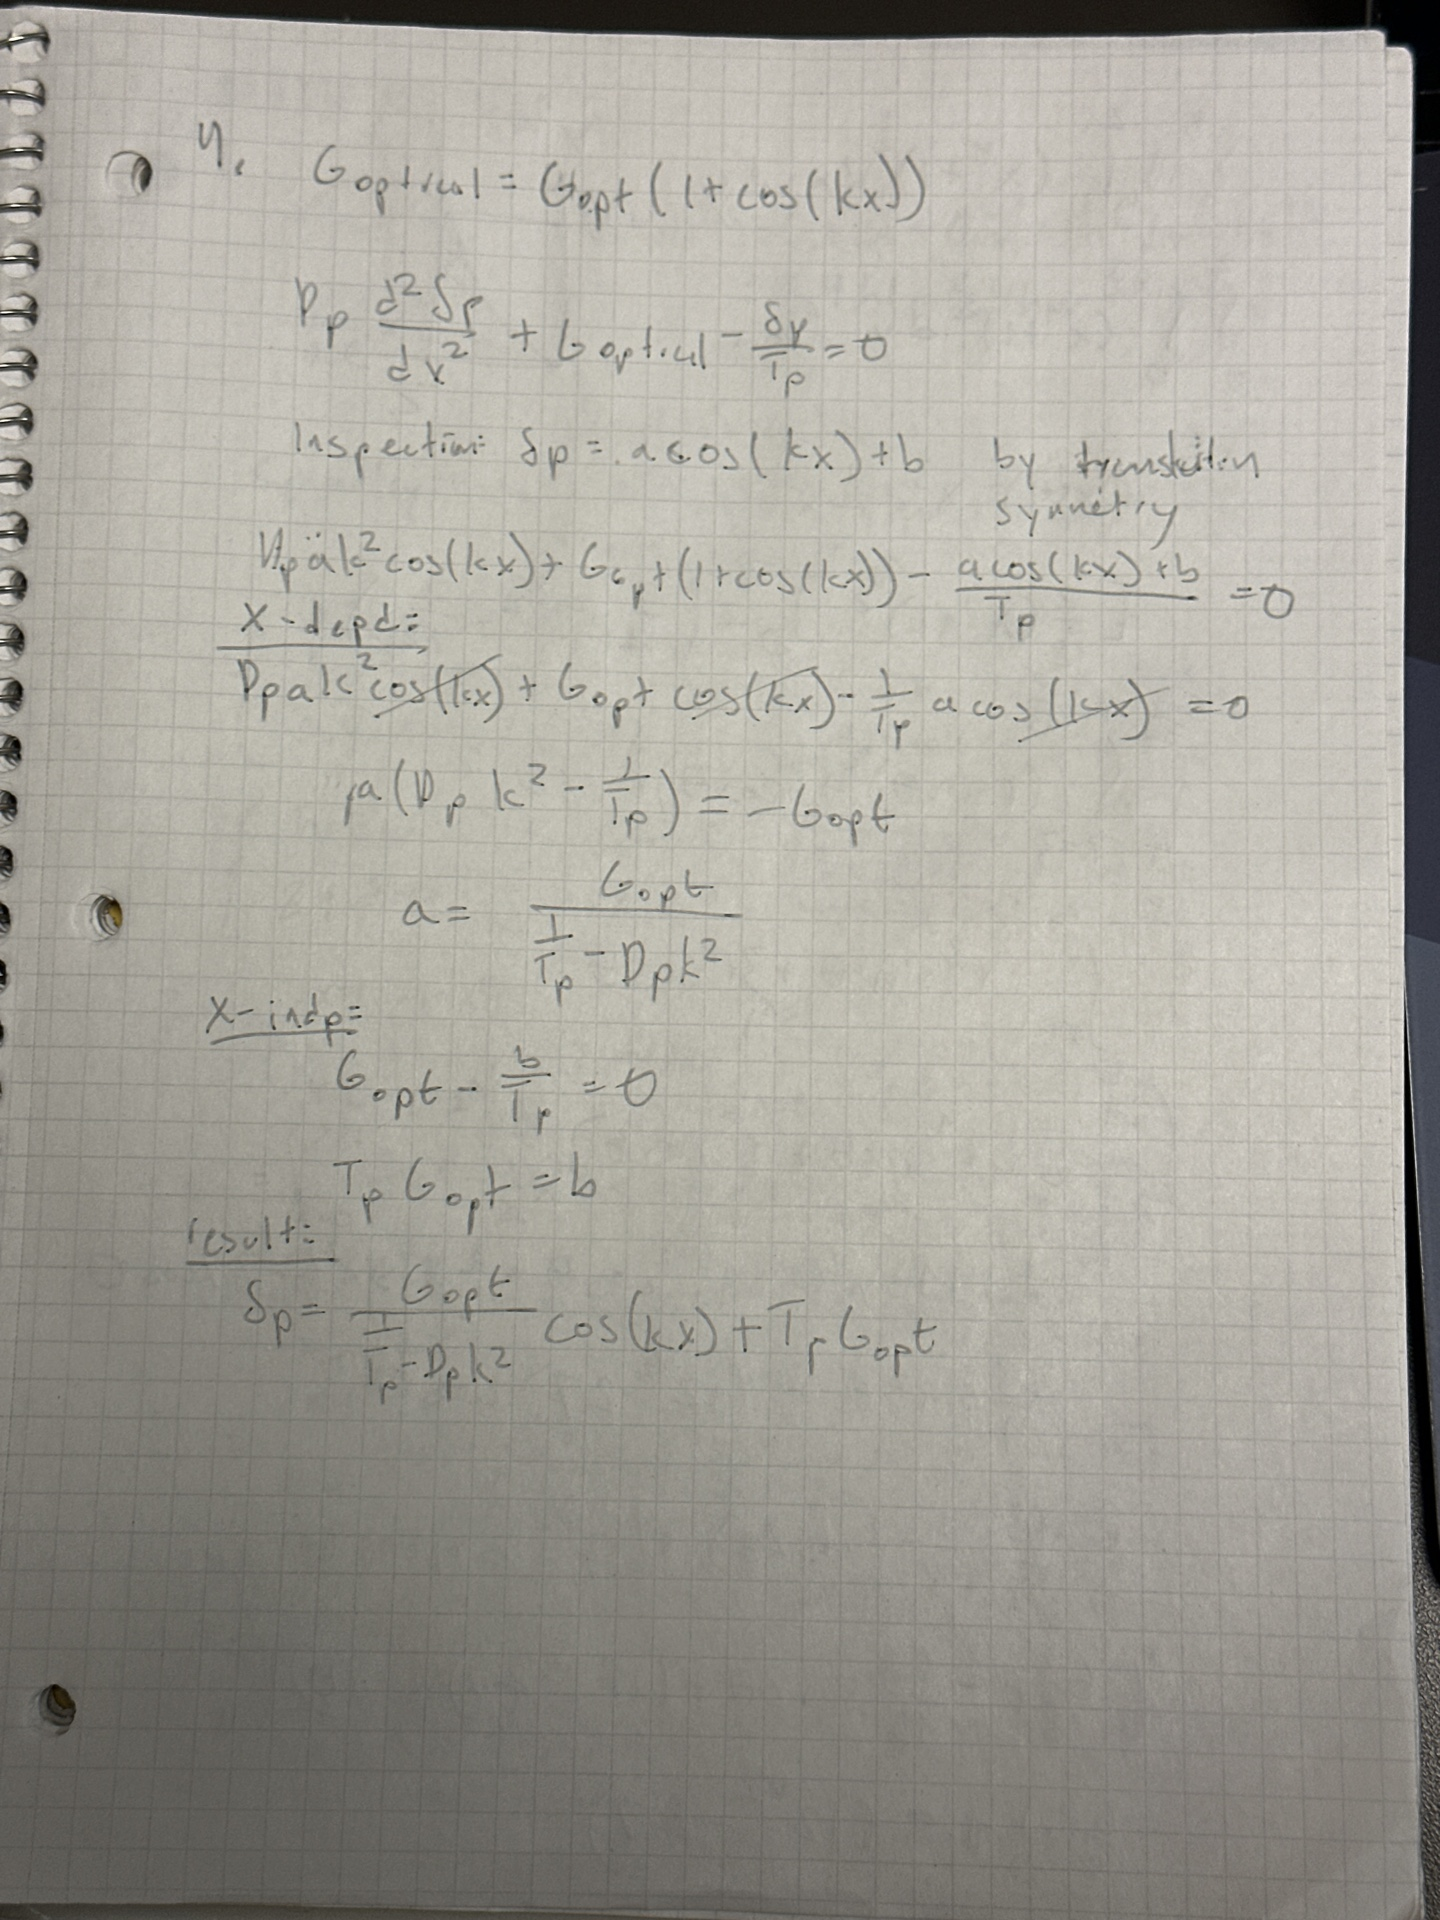

In [12]:
from IPython.display import Image
display(md("**Problem 4**"))
Image(filename="./Image3.jpeg")

In [17]:
x_min = - 5 # mm
x_max = 5

G_opt =  10**17 * cm ** -3 / second
D_p = 12 * cm ** 2 / second
t_p = 50 * us

def G_optical(x):
    return G_opt * (1 + cos(k * x))

def dp(x, k):
    return G_opt / (1/ t_p - D_p * k**2) * cos(k * x) + t_p * G_opt
    
@without_units(mm, cm ** -3)
def dp_100um(x):
    return dp(x, 1 / (100*um))

@without_units(mm, cm ** -3)
def dp_20um(x):
    return dp(x, 1 / (20*um))

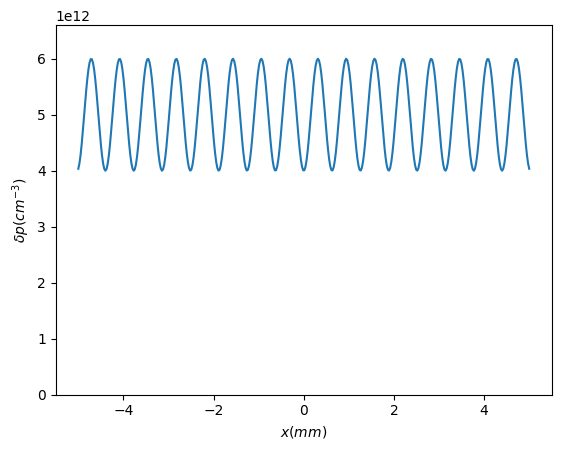

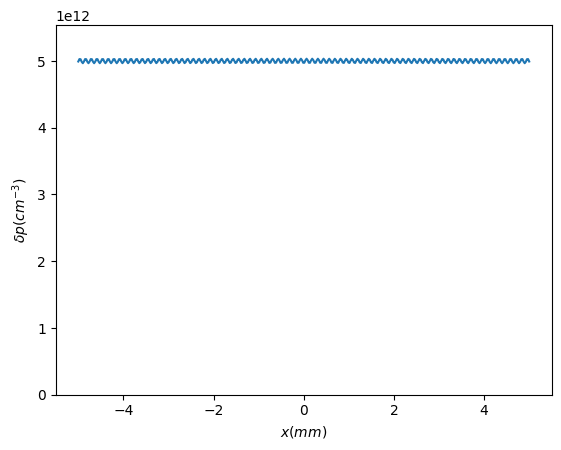

In [19]:
x = np.linspace(x_min , x_max, 400)
y = np.array([dp_100um(x_) for x_ in x])

plt.plot(x, y)
plt.xlabel("$x (mm)$")
plt.ylabel("$\delta p (cm^{-3})$")
plt.gca().set_ylim(ymin=0, ymax =float(np.max(y)*1.1))
plt.show()

x = np.linspace(x_min , x_max, 400)
y = np.array([dp_20um(x_) for x_ in x])

plt.plot(x, y)
plt.xlabel("$x (mm)$")
plt.ylabel("$\delta p (cm^{-3})$")
plt.gca().set_ylim(ymin=0, ymax =float(np.max(y)*1.1))
plt.show()

